In [1]:
import pymatgen as mg
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

import matplotlib.pyplot as plt
%matplotlib inline

/Users/karthikguda/miniconda2/envs/my_pymatgen/lib/python2.7/site-packages/pymatgen/__init__.py:89: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")


In [2]:
ls

DOS/
GaN_bandstructure_DOS.ipynb
KPOINTS
KPOINTS_Si.path
Matminer_machine_learning_example.ipynb
OUTCAR
PBE_GGA/
POSCAR
POTCAR
Untitled.ipynb
dos_plot
gen_kpath.py
lot_dos_1.pdf
plot_bands_new.py
plot_dos.py
plot_dos_1.py
vasprun.xml


In [7]:
run = BSVasprun("vasprun.xml", parse_projected_eigen=True)
run1 = BSVasprun("PBE_GGA/vasprun.xml", parse_projected_eigen=True)
bs = run.get_band_structure("KPOINTS_Si.path")
bs1 = run1.get_band_structure("PBE_GGA/KPOINTS")
print("number of bands", bs.nb_bands)
print("number of bands", bs1.nb_bands)

('number of bands', 20)
('number of bands', 20)


In [8]:
bs.bands
print(bs.get_band_gap())
print(bs.get_vbm())
print(bs1.get_band_gap())
print(bs1.get_vbm())

{'energy': 2.0387999999999997, 'transition': u'\\Gamma-\\Gamma', 'direct': True}
{u'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x111c1dc50>, u'kpoint_index': [0, 299, 300], u'energy': 3.0383, u'band_index': defaultdict(<type 'list'>, {<Spin.up: 1>: [6, 7]}), u'projections': {<Spin.up: 1>: array([[0.    , 0.    , 0.    , 0.    ],
       [0.0235, 0.0235, 0.241 , 0.241 ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.0074, 0.0074, 0.076 , 0.076 ],
       [0.013 , 0.013 , 0.    , 0.    ],
       [0.0182, 0.0182, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.0057, 0.0057, 0.    , 0.    ],
       [0.0411, 0.0411, 0.    , 0.    ]])}}
{'energy': 1.6300999999999997, 'transition': u'\\Gamma-\\Gamma', 'direct': True}
{u'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x113d431d0>, u'kpoint_index': [0, 299, 300], u'energy': 2.5267, u'band_index': defaultdict(<type 'list'>, {<Spin.up: 1>: [6, 7]}), u'projections': {<Spin.

In [9]:
n = 0
for kpoints, e in zip(bs.kpoints, bs.bands[Spin.up][9, :]):
    n += 1
    if n == 11:
        print("...")
    if 10 < n < 190:
        continue

    print("kx = %5.3f  ky = %5.3f  kz = %5.3f   eps(k) = %8.4f" % (tuple(kpoints.frac_coords) +  (e,)))

kx = 0.000  ky = 0.000  kz = 0.000   eps(k) =   7.3238
kx = 0.005  ky = 0.000  kz = 0.000   eps(k) =   7.3256
kx = 0.010  ky = 0.000  kz = 0.000   eps(k) =   7.3311
kx = 0.015  ky = 0.000  kz = 0.000   eps(k) =   7.3401
kx = 0.020  ky = 0.000  kz = 0.000   eps(k) =   7.3527
kx = 0.025  ky = 0.000  kz = 0.000   eps(k) =   7.3688
kx = 0.030  ky = 0.000  kz = 0.000   eps(k) =   7.3883
kx = 0.035  ky = 0.000  kz = 0.000   eps(k) =   7.4110
kx = 0.040  ky = 0.000  kz = 0.000   eps(k) =   7.4368
kx = 0.045  ky = 0.000  kz = 0.000   eps(k) =   7.4657
...
kx = 0.350  ky = 0.300  kz = 0.000   eps(k) =  10.7075
kx = 0.348  ky = 0.303  kz = 0.000   eps(k) =  10.7252
kx = 0.347  ky = 0.306  kz = 0.000   eps(k) =  10.7424
kx = 0.345  ky = 0.310  kz = 0.000   eps(k) =  10.7590
kx = 0.343  ky = 0.313  kz = 0.000   eps(k) =  10.7752
kx = 0.342  ky = 0.316  kz = 0.000   eps(k) =  10.7908
kx = 0.340  ky = 0.320  kz = 0.000   eps(k) =  10.8060
kx = 0.338  ky = 0.323  kz = 0.000   eps(k) =  10.8207
kx = 0

In [10]:
bsplot = BSPlotter(bs)
bsplot1 = BSPlotter(bs1)

3.26780059
2.79833515


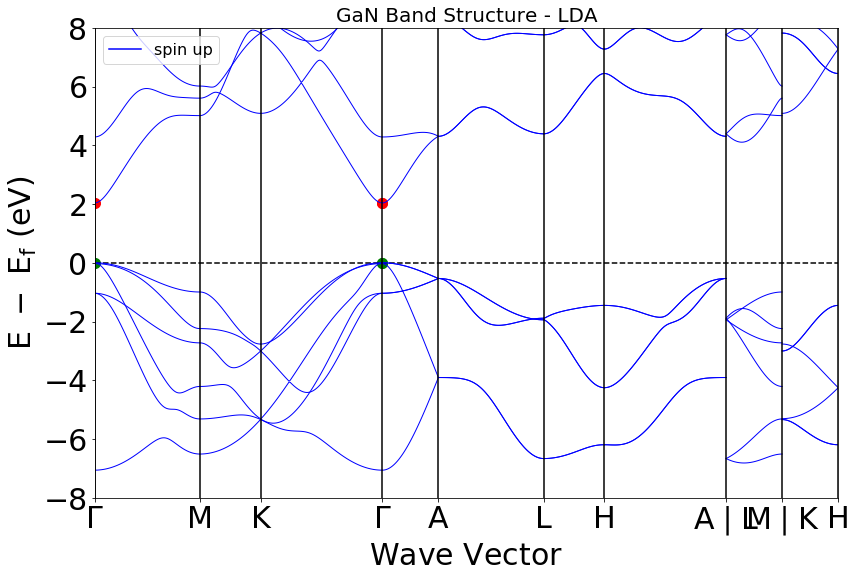

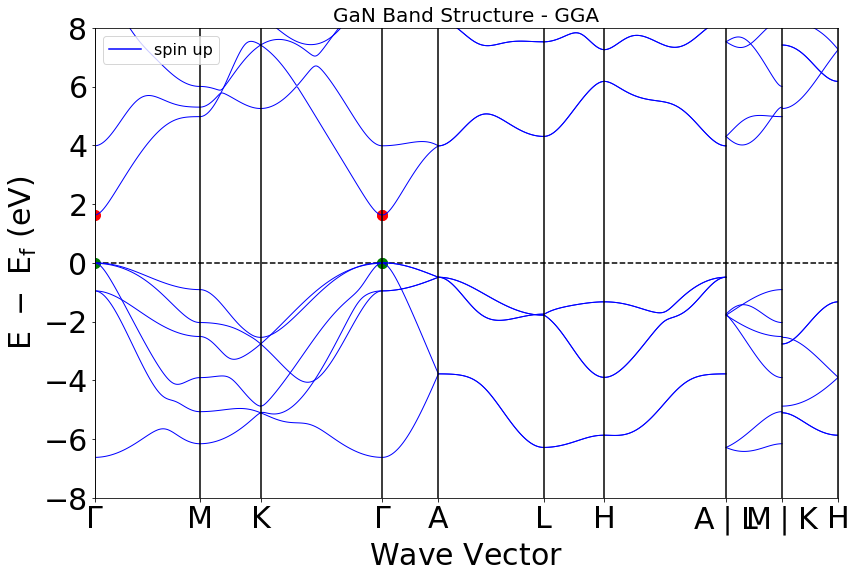

In [12]:
# get the plot
bsplot.get_plot(ylim=(-8, 8), zero_to_efermi=True,vbm_cbm_marker=True)
# add some features
ax = plt.gca()
ax.set_title("GaN Band Structure - LDA", fontsize=20)
xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

# add legend
ax.plot((), (), "b-", label="spin up")
#ax.plot((), (), "r--", label="spin down")
ax.legend(fontsize=16, loc="upper left")

bsplot1.get_plot(ylim=(-8, 8), zero_to_efermi=True,vbm_cbm_marker=True)
print(bs.efermi)
print(bs1.efermi)

# add some features
ax = plt.gca()
ax.set_title("GaN Band Structure - GGA", fontsize=20)
xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

# add legend
ax.plot((), (), "b-", label="spin up")
#ax.plot((), (), "r--", label="spin down")
ax.legend(fontsize=16, loc="upper left")

In [14]:
dosrun = Vasprun("./PBE_GGA/DOS/vasprun.xml", parse_dos=True)
dos = dosrun.complete_dos
print(dosrun.efermi)
print(dos.efermi)
print(dos.get_gap())
print(dos.get_interpolated_gap())

2.74556375
2.74556375
1.2675999999999998
(1.361665077915108, 4.097178009302326, 2.7355129313872175)


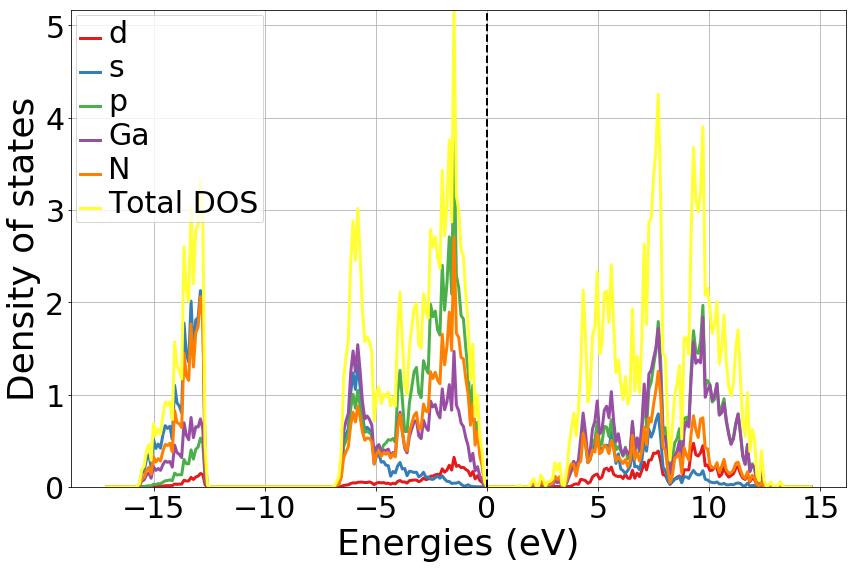

In [15]:
dosplot = DosPlotter(sigma=0.05)
dosplot.add_dos("Total DOS", dos)
dosplot.add_dos_dict(dos.get_element_dos())
dosplot.add_dos_dict(dos.get_spd_dos())
plt = dosplot.get_plot()
plt.grid()